#                                           Energy Prediction Based On Devices Using Internet Of Things (IOT)
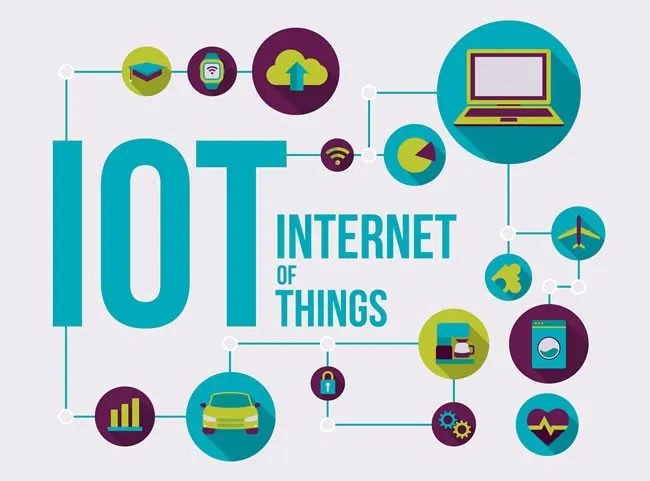

### Goal
The goal of this portfolio is to predict the energy usage of a house based on Internet of Things (IoT) measurements of temperature and humidity and weather observations.
### Introduction
Calculating energy consumption in residential areas is explained by number of occupants and electrical appliances used by them.  Using these devices leave back traceable signals in the vicinity of the device such as temperature, humidity, vibrations, light and noise.  Linear models have been used to predict the energy consumed based on different data sources and environment parameters.  

### Variable Description


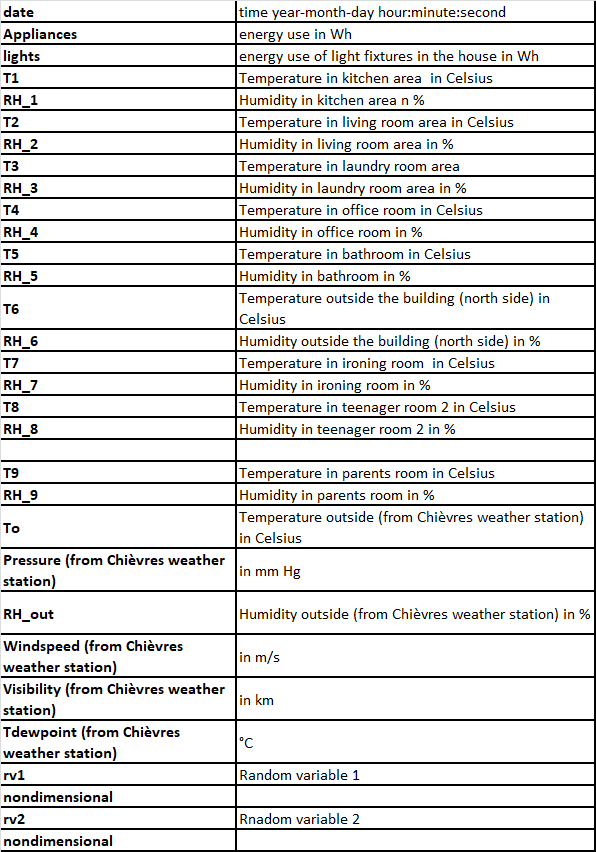

In [84]:
# Loading Libraries
import os
import numpy as np
import seaborn as sns
import pandas as pd
import sklearn
print(sklearn.__version__)

from matplotlib import pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

0.23.2


In [85]:
# Function to calculate MAE %
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [86]:
# Read the training and testing data
train= pd.read_csv('data/training.csv')
test=pd.read_csv('data/testing.csv')
print(train.shape)
print(test.shape)

(14803, 32)
(4932, 32)


### Data Exploration 

In [87]:

train.describe().T

,count,mean,std,min,25%,50%,75%,max
Appliances,14803.0,98.011214,102.828019,10.000000,50.000000,60.000000,100.000000,1080.000000
lights,14803.0,3.802608,7.940340,0.000000,0.000000,0.000000,0.000000,50.000000
T1,14803.0,21.684167,1.607780,16.790000,20.730000,21.600000,22.600000,26.260000
RH_1,14803.0,40.271439,3.981741,27.023333,37.361667,39.656667,43.090000,63.360000
T2,14803.0,20.342506,2.191842,16.100000,18.823333,20.000000,21.500000,29.856667
RH_2,14803.0,40.418056,4.066223,20.893333,37.900000,40.500000,43.290000,56.026667
T3,14803.0,22.262628,2.013785,17.200000,20.790000,22.100000,23.290000,29.236000
RH_3,14803.0,39.249149,3.252755,28.766667,36.900000,38.530000,41.761667,50.163333
T4,14803.0,20.855433,2.044786,15.100000,19.500000,20.666667,22.100000,26.200000
RH_4,14803.0,39.030359,4.339783,27.660000,35.530000,38.400000,42.130000,51.063333


#### Findings
* Lights column has min value as 0.  Domestic household cannot have light usage 0
* Appliances column has a mean value of 98 while the max value of the column is 1080.  This shows that this parameter has a lot of outliers.

In [88]:
train.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,NSM,WeekStatus,Day_of_week
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,61200,Weekday,Monday
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,61800,Weekday,Monday
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,62400,Weekday,Monday
3,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097,63600,Weekday,Monday
4,2016-01-11 17:50:00,50,40,19.89,46.026667,19.2,44.500000,19.79,44.933333,18.890000,...,734.0,92.0,5.333333,43.833333,4.8,44.919484,44.919484,64200,Weekday,Monday


In [89]:
test.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,NSM,WeekStatus,Day_of_week
0,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.79,45.000000,18.89,...,733.800000,92.000000,6.000000,51.5,5.000000,45.410389,45.410389,63000,Weekday,Monday
1,2016-01-11 18:00:00,60,50,19.890000,45.766667,19.200000,44.500000,19.79,44.900000,18.89,...,734.100000,92.000000,5.000000,40.0,4.700000,47.233763,47.233763,64800,Weekday,Monday
2,2016-01-11 18:40:00,230,70,19.926667,45.863333,19.356667,44.400000,19.79,44.900000,18.89,...,734.366667,91.333333,5.666667,40.0,4.633333,10.298729,10.298729,67200,Weekday,Monday
3,2016-01-11 18:50:00,580,60,20.066667,46.396667,19.426667,44.400000,19.79,44.826667,19.00,...,734.433333,91.166667,5.833333,40.0,4.616667,8.827838,8.827838,67800,Weekday,Monday
4,2016-01-11 19:30:00,100,10,20.566667,53.893333,20.033333,46.756667,20.10,48.466667,19.00,...,734.850000,89.500000,6.000000,40.0,4.350000,24.884962,24.884962,70200,Weekday,Monday


In [90]:
# Check for missing values
train.isna().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
NSM            0
WeekStatus     0
Day_of_week    0
dtype: int64

In [91]:
# Check for missing values
test.isna().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
NSM            0
WeekStatus     0
Day_of_week    0
dtype: int64

In [92]:
# Convert the column in to date
train['date'] = pd.to_datetime(train['date'])

#### Line plot to show Appliances energy consumption measurement for the whole period

In [93]:

import plotly.express as px
fig = px.line(train, x='date', y="Appliances")
fig.show()


There is one spike that shows Appliances with value 1080. There is no clear pattern about with respect to time.  

In [94]:
train['week_number'] = train['date'].dt.week
df_grp_app = train[train['week_number']==2]
df_grp_app

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,NSM,WeekStatus,Day_of_week,week_number
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,92.0,7.000000,63.000000,5.3,13.275433,13.275433,61200,Weekday,Monday,2
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,92.0,6.666667,59.166667,5.2,18.606195,18.606195,61800,Weekday,Monday,2
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,92.0,6.333333,55.333333,5.1,28.642668,28.642668,62400,Weekday,Monday,2
3,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,92.0,5.666667,47.666667,4.9,10.084097,10.084097,63600,Weekday,Monday,2
4,2016-01-11 17:50:00,50,40,19.890000,46.026667,19.200000,44.500000,19.790000,44.933333,18.890000,...,92.0,5.333333,43.833333,4.8,44.919484,44.919484,64200,Weekday,Monday,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,2016-01-17 23:00:00,70,10,22.200000,39.700000,20.700000,39.560000,20.500000,39.790000,21.133333,...,83.0,2.000000,29.000000,-4.9,41.594949,41.594949,82800,Weekend,Sunday,2
672,2016-01-17 23:10:00,50,10,22.100000,39.826667,20.566667,39.590000,20.463333,39.760000,21.200000,...,83.5,2.000000,28.333333,-4.9,38.342138,38.342138,83400,Weekend,Sunday,2
673,2016-01-17 23:20:00,70,10,22.100000,39.900000,20.500000,39.663333,20.390000,39.700000,21.200000,...,84.0,2.000000,27.666667,-4.9,13.639016,13.639016,84000,Weekend,Sunday,2
674,2016-01-17 23:40:00,70,20,21.926667,39.900000,20.390000,39.863333,20.390000,39.760000,21.133333,...,85.0,2.000000,26.333333,-4.9,11.288092,11.288092,85200,Weekend,Sunday,2


#### Line graph displaying the usage of energy for the first week

In [95]:
fig = px.line(df_grp_app, x='date', y="Appliances")
fig.show()


There a some spikes which during the evening hours on 14th, 16th and 17th of Jan where the energy usage goes beyond 800.  While most of the energy usage lies between 400-500 Wh.

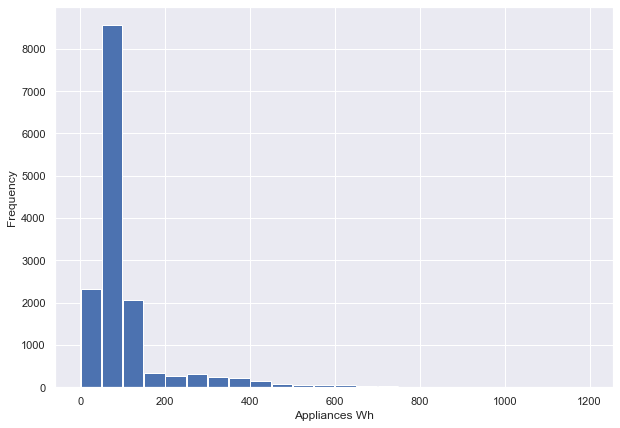

In [96]:
# Creating histogram 
fig, ax = plt.subplots(figsize =(10, 7)) 
ax.hist(train['Appliances'], bins = [0, 50, 100, 150, 200,250,300,350,400,450,500,550
                                     ,600,650,700,750,800,850,900,1000,1200], histtype='bar',rwidth=0.96,color='b') 
plt.xlabel('Appliances Wh')
plt.ylabel('Frequency')
# Show plot 
plt.show() 

The histogram clearly shows the uneven distribution of values for the parameter Appliances.  The skewness is heavily tilted towards the right, leaving a long tail.  This also shows data with high variance.

In [97]:
train["Appliances"] = np.log(train["Appliances"])
test["Appliances"] = np.log(test["Appliances"])
train.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,NSM,WeekStatus,Day_of_week,week_number
0,2016-01-11 17:00:00,4.094345,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,92.0,7.000000,63.000000,5.3,13.275433,13.275433,61200,Weekday,Monday,2
1,2016-01-11 17:10:00,4.094345,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,92.0,6.666667,59.166667,5.2,18.606195,18.606195,61800,Weekday,Monday,2
2,2016-01-11 17:20:00,3.912023,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,92.0,6.333333,55.333333,5.1,28.642668,28.642668,62400,Weekday,Monday,2
3,2016-01-11 17:40:00,4.094345,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,92.0,5.666667,47.666667,4.9,10.084097,10.084097,63600,Weekday,Monday,2
4,2016-01-11 17:50:00,3.912023,40,19.89,46.026667,19.2,44.500000,19.79,44.933333,18.890000,...,92.0,5.333333,43.833333,4.8,44.919484,44.919484,64200,Weekday,Monday,2


(array([   6.,  267., 2049., 5737., 3569., 1491.,  585.,  745.,  291.,
          63.]),
 array([2.30258509, 2.77079822, 3.23901134, 3.70722446, 4.17543758,
        4.64365071, 5.11186383, 5.58007695, 6.04829007, 6.5165032 ,
        6.98471632]),
 <a list of 10 Patch objects>)

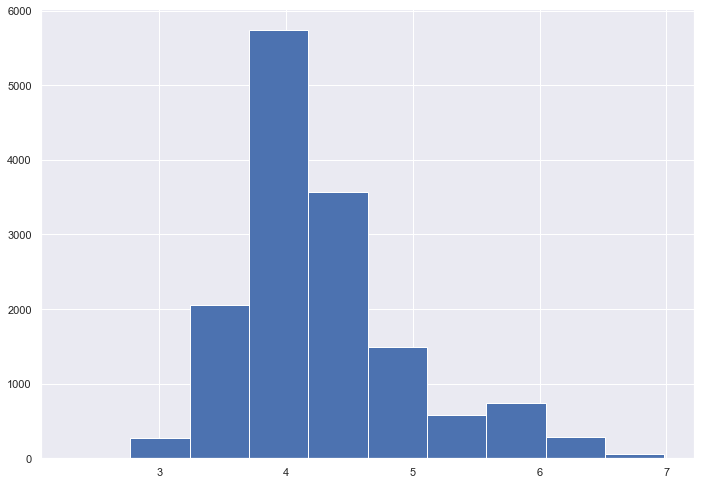

In [98]:
plt.hist(train["Appliances"])

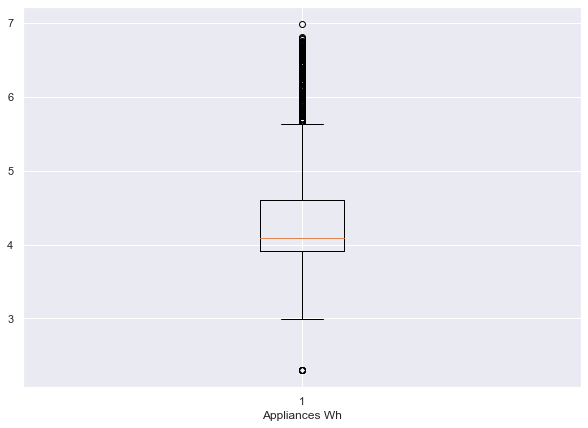

In [99]:
# Creating plot 
plt.subplots(figsize =(10, 7))
plt.boxplot(train['Appliances']) 
plt.xlabel('Appliances Wh')
# Show plot 
plt.show()

The box plot clearly shows that this parameter has a high number of outliers, thereby distorting the mean and the inter-quartile range.

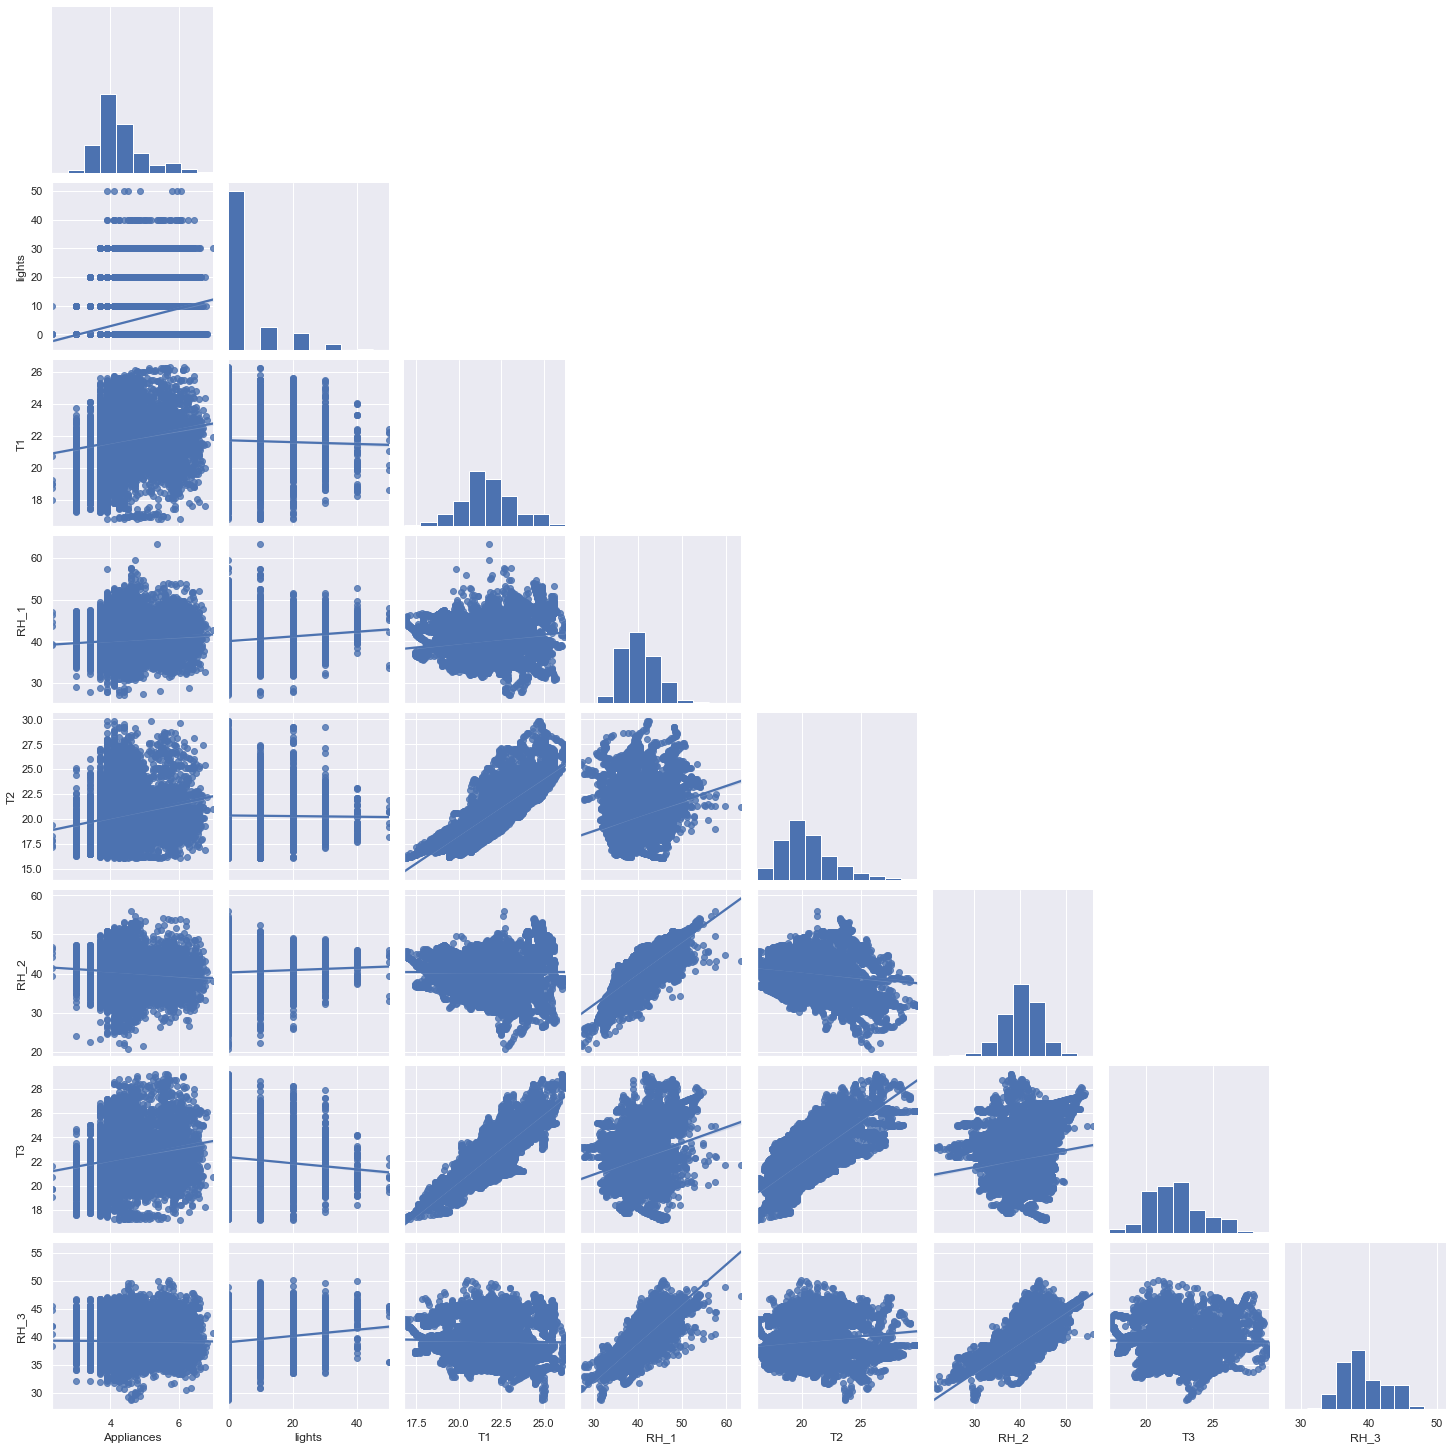

In [100]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
df_for_htmap = train[['Appliances','lights','T1','RH_1','T2','RH_2','T3','RH_3']]
df_for_htmap
sns.pairplot(df_for_htmap, kind="reg", diag_kind="hist",corner=True)

### Pair Plot 
* Pair plot shows the distribution of the data for the parameter and its correlation with other parameters that have been paired. 
* There is a positive correlation between the energy consumption of appliances and lights
* High correlation can also be seen between appliances and T2. 
* Strong correlation between the parameters T1 & T3 can also be seen

In [106]:
df_for_htmap = train[['Appliances','lights','T1','RH_1','T2','RH_2','T3','RH_3',
                     'T4','RH_4','T5','RH_5','T6','RH_6','T7','RH_7','T8','RH_8','T9','RH_9']]
corr = df_for_htmap.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9
Appliances,1.00,0.26,0.16,0.09,0.22,-0.09,0.17,-0.01,0.14,-0.01,0.11,0.02,0.20,-0.18,0.12,-0.10,0.16,-0.17,0.10,-0.11
lights,0.26,1.00,-0.03,0.11,-0.01,0.06,-0.10,0.14,-0.01,0.12,-0.08,0.14,-0.08,0.16,-0.14,0.04,-0.07,0.02,-0.16,-0.01
T1,0.16,-0.03,1.00,0.17,0.84,0.00,0.89,-0.03,0.88,0.10,0.88,-0.01,0.66,-0.61,0.84,0.14,0.82,-0.01,0.85,0.07
RH_1,0.09,0.11,0.17,1.00,0.27,0.80,0.26,0.85,0.11,0.88,0.21,0.30,0.32,0.24,0.02,0.80,-0.03,0.74,0.12,0.77
T2,0.22,-0.01,0.84,0.27,1.00,-0.16,0.74,0.12,0.76,0.23,0.72,0.03,0.80,-0.58,0.66,0.23,0.58,0.07,0.68,0.16
RH_2,-0.09,0.06,0.00,0.80,-0.16,1.00,0.14,0.68,-0.04,0.72,0.11,0.25,-0.01,0.39,-0.05,0.69,-0.04,0.68,0.06,0.68
T3,0.17,-0.10,0.89,0.26,0.74,0.14,1.00,-0.01,0.85,0.13,0.89,-0.07,0.69,-0.65,0.85,0.18,0.79,0.04,0.90,0.14
RH_3,-0.01,0.14,-0.03,0.85,0.12,0.68,-0.01,1.00,-0.14,0.90,-0.05,0.38,0.08,0.51,-0.25,0.83,-0.28,0.83,-0.19,0.84
T4,0.14,-0.01,0.88,0.11,0.76,-0.04,0.85,-0.14,1.00,-0.05,0.87,-0.08,0.66,-0.70,0.87,0.05,0.79,-0.09,0.89,-0.02
RH_4,-0.01,0.12,0.10,0.88,0.23,0.72,0.13,0.90,-0.05,1.00,0.09,0.35,0.26,0.39,-0.13,0.89,-0.16,0.85,-0.04,0.86


In [119]:
# Multicollinearity issue
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["val"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    
    #print (vif)
    return(vif)

In [120]:
X = df_for_htmap.iloc[:,:-1]
print(calc_vif(X))

     variables          val
0   Appliances    55.553163
1       lights     1.609238
2           T1  3370.823354
3         RH_1  1577.271218
4           T2  2337.530934
5         RH_2  1964.142512
6           T3  1236.487805
7         RH_3  1185.564289
8           T4   977.314669
9         RH_4  1306.799737
10          T5  1088.045205
11        RH_5    44.805061
12          T6    17.280423
13        RH_6    30.467442
14          T7  1399.087035
15        RH_7   439.601903
16          T8   957.620852
17        RH_8   511.001292
18          T9  2308.370719


#### Multicollinearity issue
Multicollinearity occurs when two or more independent variables are highly correlated with one another in a regression model.
Multicollinearity can be a problem in a regression model because we would not be able to distinguish between the individual effects of the independent variables on the dependent variable. Multicollinearity may not affect the accuracy of the model as much. But we might lose reliability in determining the effects of individual features in your model 

Multicollinearity can be detected using VIF (Variable Inflation Factors).
VIF determines the strength of the correlation between the independent variables. It is predicted by taking a variable and regressing it against every other variable.

VIF starts at 1 and has no upper limit
VIF = 1, no correlation between the independent variable and the other variables
VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others

Dropping one of the correlated features will help in bringing down the multicollinearity between correlated features. Dropping variables should be an iterative process starting with the variable having the largest VIF value because its trend is highly captured by other variables. If you do this, you will notice that VIF values for other variables would have reduced too, although to a varying extent.

#### Cannot be resolved by dropping features
In this dataset, the VIF factors for most of the variables are extremely high ranging from 1 - 3370.  Dropping features cannot resove the issue of multicollinearity.

In [121]:
train['hour'] = train['date'].dt.hour
train.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,Windspeed,Visibility,Tdewpoint,rv1,rv2,NSM,WeekStatus,Day_of_week,week_number,hour
0,2016-01-11 17:00:00,4.094345,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,7.000000,63.000000,5.3,13.275433,13.275433,61200,Weekday,Monday,2,17
1,2016-01-11 17:10:00,4.094345,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,6.666667,59.166667,5.2,18.606195,18.606195,61800,Weekday,Monday,2,17
2,2016-01-11 17:20:00,3.912023,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,6.333333,55.333333,5.1,28.642668,28.642668,62400,Weekday,Monday,2,17
3,2016-01-11 17:40:00,4.094345,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,5.666667,47.666667,4.9,10.084097,10.084097,63600,Weekday,Monday,2,17
4,2016-01-11 17:50:00,3.912023,40,19.89,46.026667,19.2,44.500000,19.79,44.933333,18.890000,...,5.333333,43.833333,4.8,44.919484,44.919484,64200,Weekday,Monday,2,17


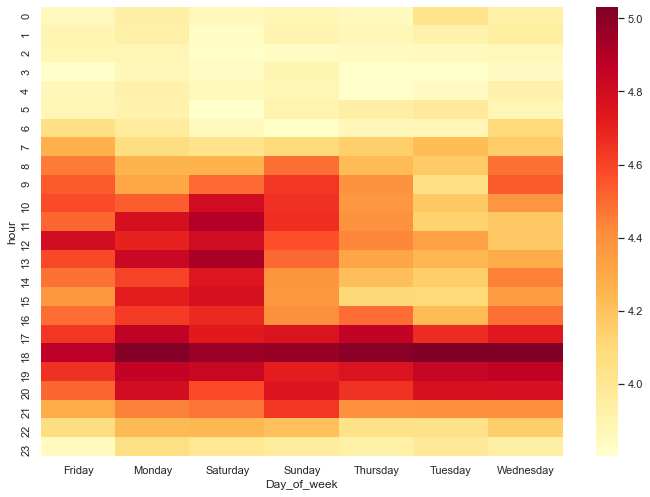

In [122]:
# pandas pivot
sns.set(rc={'figure.figsize':(11.7,8.27)})
heatmap1_data = pd.pivot_table(train, values='Appliances', 
                     index=['hour'], 
                     columns='Day_of_week')
sns.heatmap(heatmap1_data, cmap="YlOrRd")

### Hourly heat map was created for one week of data 
* It can be clearly seen, there is a strong time component in the energy consumption pattern. 
* The energy consumption starts to increase around 6am. By noon, there are energy load drop with an exception on Monday. The energy demand also rise around 6 in the evening. 
* There is no clear pattern regarding the day of the week.


## Model training using numeric features only (28 features)

In [123]:
# Getting data and labels for training and testing sets.
x_train= train.drop(['date', 'Appliances', 'WeekStatus', 'Day_of_week','hour','week_number'], axis=1)
y_train=train['Appliances']
x_test= test.drop(['date', 'Appliances', 'WeekStatus', 'Day_of_week'], axis=1)
y_test=test['Appliances']

In [124]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(14803, 28)
(14803,)
(4932, 28)
(4932,)


In [125]:
#Model initialiasation
model1=LinearRegression()

#Model training
model1.fit(x_train, y_train)

#Making predictions on training and testing set
y_train_predictions=model1.predict(x_train)
y_test_predictions=model1.predict(x_test)

#Calculating scores based on standard regression metrics
print("Scores on training set:")
print("RMSE:", np.sqrt(mean_squared_error(y_train, y_train_predictions)))
print("R2:", r2_score(y_train, y_train_predictions))
print("MAE:", mean_absolute_error(y_train, y_train_predictions))
print("MAPE%:", mean_absolute_percentage_error(y_train, y_train_predictions))
print()
print("Scores on testing set:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_test_predictions)))
print("R2:", r2_score(y_test, y_test_predictions))
print("MAE:", mean_absolute_error(y_test, y_test_predictions))
print("MAPE%:", mean_absolute_percentage_error(y_test, y_test_predictions))

Scores on training set:
RMSE: 0.5585397220919538
R2: 0.2831627008568044
MAE: 0.3925337066694398
MAPE%: 8.871832983772759

Scores on testing set:
RMSE: 0.551532583065786
R2: 0.27097470607790164
MAE: 0.38407557834446915
MAPE%: 8.66561643390076


### Converting categorical columns to dummy variables.

In [126]:
set(train['WeekStatus'])

{'Weekday', 'Weekend'}

In [127]:
set(train['Day_of_week'])

{'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'}

In [128]:
train_status=pd.get_dummies(train['WeekStatus'])
test_status=pd.get_dummies(test['WeekStatus'])
train_status.head()

,Weekday,Weekend
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [129]:
train_day=pd.get_dummies(train['Day_of_week'])
test_day= pd.get_dummies(test['Day_of_week'])  
train_day.head()                        
                         

,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0


In [130]:
train_df=train.join(train_status)
test_df=test.join(test_status)

In [131]:
train_full= train_df.join(train_day)
test_full= test_df.join(train_day)
print(train_full.shape)
print(test_full.shape)

(14803, 43)
(4932, 41)


### Modelling using all variables.

In [132]:
#Getting data and tabels for training and testing sets
x_train= train_full.drop(['date', 'Appliances', 'WeekStatus', 'Day_of_week','hour','week_number'], axis=1)
y_train=train_full['Appliances']
x_test= test_full.drop(['date', 'Appliances', 'WeekStatus', 'Day_of_week'], axis=1)
y_test=test_full['Appliances']
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(14803, 37)
(4932, 37)
(14803,)
(4932,)


In [133]:
x_test.head()

,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,NSM,Weekday,Weekend,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,40,19.890000,46.066667,19.200000,44.590000,19.79,45.000000,18.89,45.723333,17.166667,...,63000,1,0,0,1,0,0,0,0,0
1,50,19.890000,45.766667,19.200000,44.500000,19.79,44.900000,18.89,45.790000,17.100000,...,64800,1,0,0,1,0,0,0,0,0
2,70,19.926667,45.863333,19.356667,44.400000,19.79,44.900000,18.89,46.430000,17.100000,...,67200,1,0,0,1,0,0,0,0,0
3,60,20.066667,46.396667,19.426667,44.400000,19.79,44.826667,19.00,46.430000,17.100000,...,67800,1,0,0,1,0,0,0,0,0
4,10,20.566667,53.893333,20.033333,46.756667,20.10,48.466667,19.00,48.490000,17.150000,...,70200,1,0,0,1,0,0,0,0,0


In [134]:
RMSE_test=np.sqrt(mean_squared_error(y_test, y_test_predictions))
R2_test=r2_score(y_test, y_test_predictions)
MAE_test=mean_absolute_error(y_test, y_test_predictions)
MAPE_test=mean_absolute_percentage_error(y_test, y_test_predictions)
print("For testing data")
print("RMSE:", RMSE_test)
print("R2:",R2_test)
print("MAE:",MAE_test )
print("MAPE:",MAPE_test)

For testing data
RMSE: 0.551532583065786
R2: 0.27097470607790164
MAE: 0.38407557834446915
MAPE: 8.66561643390076


### Feature selection using RFE
RFE is popular because it is easy to configure and use and because it is effective at selecting those features (columns) in a training dataset that are more or most relevant in predicting the target variable.

There are two important configuration options when using RFE: the choice in the number of features to select and the choice of the algorithm used to help choose features. Both of these hyperparameters can be explored. Feature selection refers to techniques that select a subset of the most relevant features (columns) for a dataset. Fewer features can allow machine learning algorithms to run more efficiently (less space or time complexity) and be more effective.

### Linear Regression and Feature Elimination

In [136]:
#Feature selection using RFE
from sklearn.feature_selection import RFE
estimator = LinearRegression()
RSME_scores=[]
for i in range(1, 38):
    selector=RFE(estimator, n_features_to_select=i)
    selector.fit(x_train, y_train)
    y_test_pred= selector.predict(x_test)
    rmse_test=np.sqrt(mean_squared_error(y_test, y_test_pred))
    #RMSE_score.append(RMSE_test)
    print("RMSE on test set using", i, "features:", rmse_test)
#print(RMSE_score)

RMSE on test set using 1 features: 0.6476739554974422
RMSE on test set using 2 features: 0.6412194673442946
RMSE on test set using 3 features: 0.6353664970685834
RMSE on test set using 4 features: 0.629440736572643
RMSE on test set using 5 features: 0.6308028604198241
RMSE on test set using 6 features: 0.630090149496267
RMSE on test set using 7 features: 0.5928246131402112
RMSE on test set using 8 features: 0.5936022972627365
RMSE on test set using 9 features: 0.5931105327708975
RMSE on test set using 10 features: 0.5819226810146354
RMSE on test set using 11 features: 0.5815716610285039
RMSE on test set using 12 features: 0.5794687430551276
RMSE on test set using 13 features: 0.5782828988067266
RMSE on test set using 14 features: 0.5781211388265137
RMSE on test set using 15 features: 0.5776387171868526
RMSE on test set using 16 features: 0.5765355725752955
RMSE on test set using 17 features: 0.5762879688353254
RMSE on test set using 18 features: 0.5760764978118182
RMSE on test set usin

In [137]:
rfe = RFE(estimator=LinearRegression(), n_features_to_select=37, step=1)
rfe.fit(x_train, y_train)
y_test_pred= rfe.predict(x_test)
rmse_test=np.sqrt(mean_squared_error(y_test, y_test_pred))
print("RMSE on test set using  ", rmse_test)
print ("RFE score on test ", rfe.score(x_test,y_test))


RMSE on test set using   0.5542864484717726
RFE score on test  0.26367631689477755


### Decision Tree 

In [156]:
from sklearn.tree import DecisionTreeRegressor
dtreg = DecisionTreeRegressor(random_state = 100)
dtreg.fit(x_train, y_train)
dtr_pred = dtreg.predict(x_test)
dtr_pred= dtr_pred.reshape(-1,1)

rmse_test=np.sqrt(mean_squared_error(y_test, dtr_pred))
print("RMSE on test set using  ", rmse_test)
R2_test=r2_score(y_test, dtr_pred)
print("R2:",R2_test)

RMSE on test set using   0.5296160651682423
R2: 0.3277627895204023


### Suppor Vector Machines (SVM)

In [157]:
from sklearn.svm import SVR
svr = SVR(kernel = 'rbf')
svr.fit(x_train, y_train)
svr_pred = svr.predict(x_test)
svr_pred= svr_pred.reshape(-1,1)

rmse_test=np.sqrt(mean_squared_error(y_test, svr_pred))
print("RMSE on test set using  ", rmse_test)
R2_test=r2_score(y_test, svr_pred)
print("R2:",R2_test)

RMSE on test set using   0.5752625464703428
R2: 0.2068917883359147


In [139]:
ranks = {}
rank_feature = pd.DataFrame()
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = list(map(lambda x: round(x,2), ranks))
    rank_feature["feature_val"] = ranks
    rank_feature["col_names"] = names
    return rank_feature

In [147]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor

colnames = x_train.columns
rf = RandomForestRegressor(n_jobs=-1, n_estimators=100, verbose=3)
rf.fit(x_train,y_train)
y_test_pred= rf.predict(x_test)
rmse_test=np.sqrt(mean_squared_error(y_test, y_test_pred))
print("RMSE on test set using  ", rmse_test)
R2_test=r2_score(y_test, y_test_pred)
print("R2:",R2_test)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    4.2s


building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   17.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


In [141]:
rf.feature_importances_
features_imp = ranking(rf.feature_importances_, colnames)
features_imp.sort_values("feature_val", axis = 0, ascending = False, 
                 inplace = True)   
features_imp

    feature_val    col_names
0          0.13       lights
1          0.05           T1
2          0.08         RH_1
3          0.08           T2
4          0.09         RH_2
5          0.15           T3
6          0.13         RH_3
7          0.08           T4
8          0.08         RH_4
9          0.07           T5
10         0.10         RH_5
11         0.07           T6
12         0.08         RH_6
13         0.07           T7
14         0.09         RH_7
15         0.23           T8
16         0.08         RH_8
17         0.11           T9
18         0.09         RH_9
19         0.06        T_out
20         0.12  Press_mm_hg
21         0.08       RH_out
22         0.06    Windspeed
23         0.06   Visibility
24         0.09    Tdewpoint
25         0.04          rv1
26         0.04          rv2
27         1.00          NSM
28         0.00      Weekday
29         0.00      Weekend
30         0.01       Friday
31         0.01       Monday
32         0.01     Saturday
33         0.0

,feature_val,col_names
27,1.00,NSM
15,0.23,T8
5,0.15,T3
0,0.13,lights
6,0.13,RH_3
20,0.12,Press_mm_hg
17,0.11,T9
10,0.10,RH_5
24,0.09,Tdewpoint
14,0.09,RH_7


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3675: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



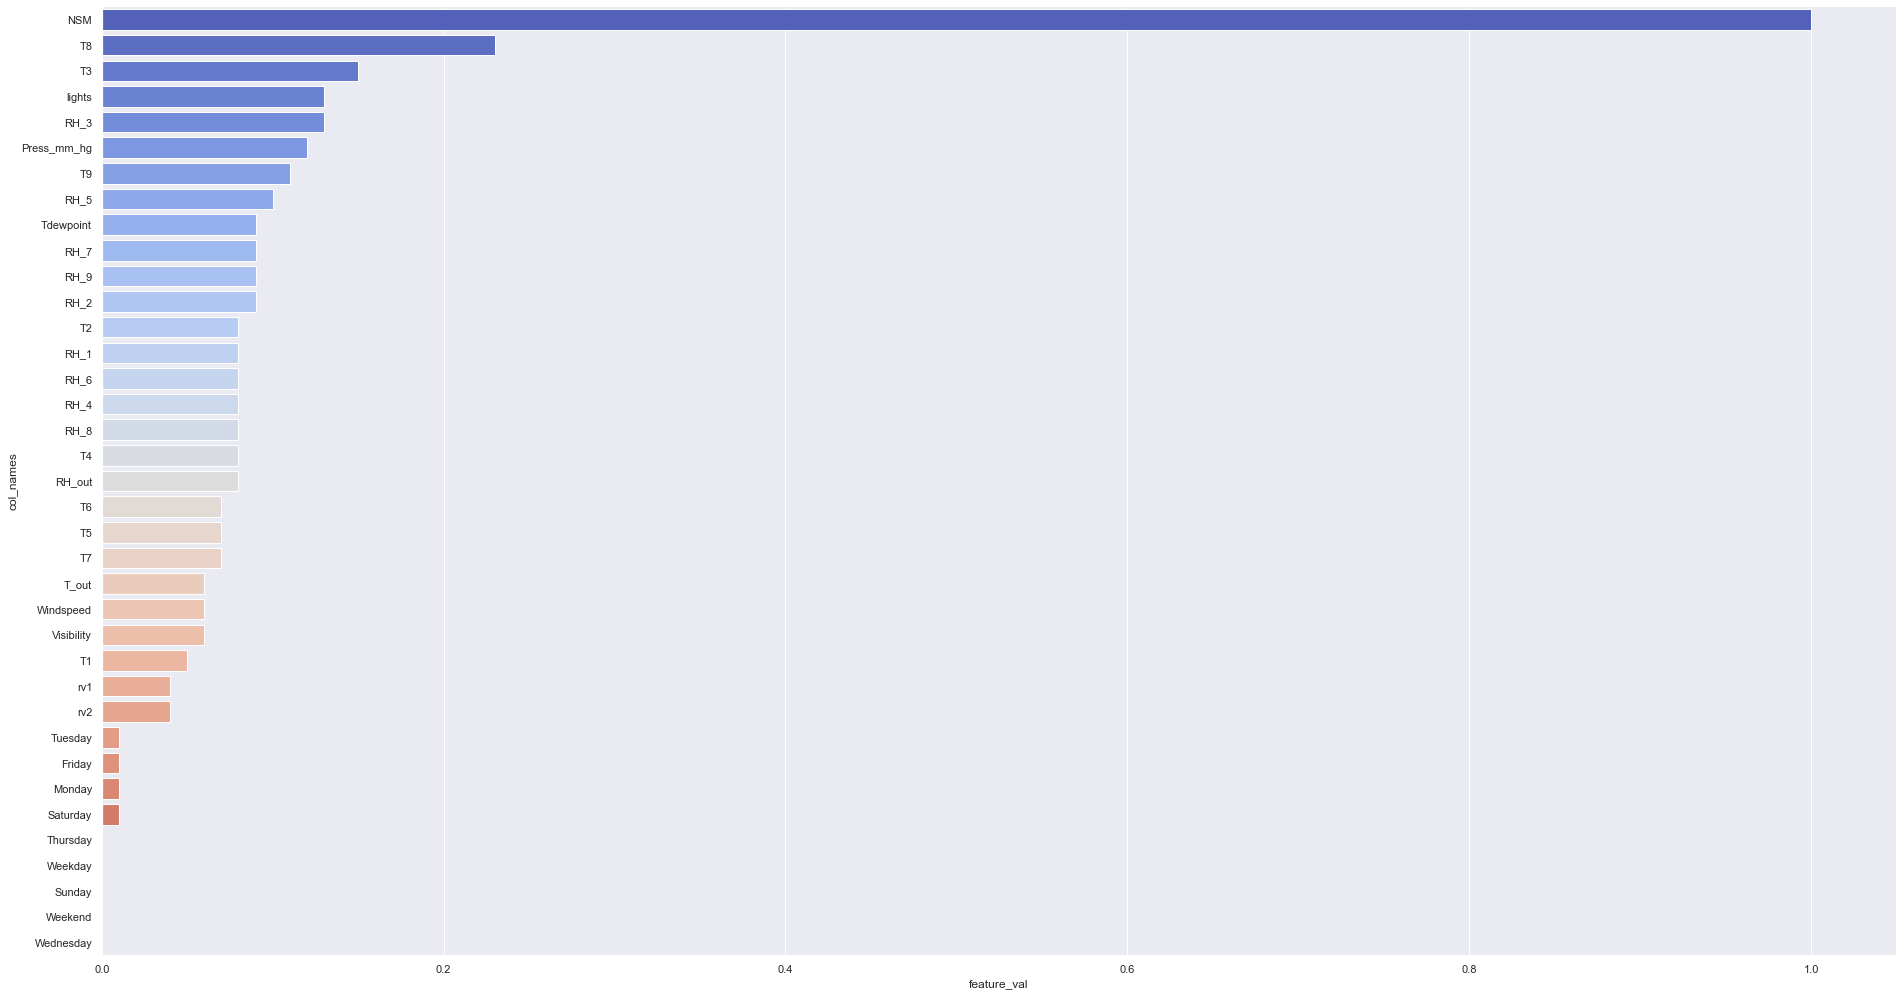

In [142]:
# Let's plot the ranking of the features
sns.factorplot(x="feature_val", y="col_names", data = features_imp, kind="bar", 
               size=14, aspect=1.9, palette='coolwarm')

### Feature elimination
It can be concluded that using 37 features reduced the RMSE value to 37%. RandomForest has with estimators = 100. Random Forest has a better score than Linear Regression. 

### Model Comparison
It can be concluded from the RMSE and R2 evaluation metrices that Random Forest Regressor model shows lower value of mean squared errors.  Let us use it as the final algorithm to fit the model.

In [158]:
rfr = RandomForestRegressor(n_estimators = 100, random_state = 0)
rfr.fit(x_train, y_train)
y_test_pred= rfr.predict(x_test)

rmse_test=np.sqrt(mean_squared_error(y_test, y_test_pred))
print("RMSE on test set using  ", rmse_test)
R2_test=r2_score(y_test, y_test_pred)
print("R2:",R2_test)

RMSE on test set using   0.3750962146834713
R2: 0.6628015182041822
